In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
import util
import time

In [11]:
folder_path = 'datasets/kaggle_comp/split_files/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'
train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

In [12]:
model = Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)),('log', LogisticRegression())])
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

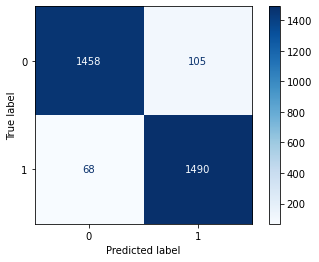

In [13]:
disp = plot_confusion_matrix(model, test_X, test_Y,cmap=plt.cm.Blues)

In [14]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, pred_Y) * 100, 2)) + "%")

Model Accuracy: 94.46%


In [15]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1563
           1       0.93      0.96      0.95      1558

    accuracy                           0.94      3121
   macro avg       0.94      0.94      0.94      3121
weighted avg       0.94      0.94      0.94      3121



In [16]:
vocab=model.named_steps['tfidf'].vocabulary_
coef=list(model.named_steps['log'].coef_[0])

top_features=[]
for i in range(100):
    k = coef.index(max(coef))
    top_features.append(k)
    coef.pop(k)

for f in top_features:
    print({k:v for k, v in vocab.items() if v == f})

{'2016': 1184}
{'hillard': 54164}
{'octavio': 82693}
{'anthros': 8198}
{'novels': 81700}
{'clintion': 23937}
{'sharan': 105290}
{'nomor': 81091}
{'elecampane': 37669}
{'electedâ': 37675}
{'selectrons': 104189}
{'akzeptierten': 5909}
{'soundtracked': 109047}
{'façon': 42748}
{'olanzapine': 83154}
{'colwin': 24843}
{'wanted': 125851}
{'11': 305}
{'artic': 9696}
{'commentators': 25058}
{'workout': 128281}
{'relais': 97191}
{'hsv': 55545}
{'wvewkizhf1szbbed5o': 128633}
{'oath': 82277}
{'cliches': 23855}
{'sneezes': 108116}
{'votarlas': 125218}
{'commendations': 25043}
{'principalement': 91843}
{'nombreuses': 81072}
{'elysees': 38055}
{'ocha': 82662}
{'pinwheeling': 88878}
{'ugric': 120328}
{'bundled': 18777}
{'privilegegrant': 91974}
{'riffraff': 99183}
{'trumpâ': 119311}
{'tobago': 117314}
{'elzbieta': 38059}
{'rpf': 100493}
{'donaldjtrumppolls': 34929}
{'26th': 1498}
{'rushbo': 100838}
{'facilitated': 41913}
{'going': 49377}
{'ils': 56972}
{'namazi': 79024}
{'freddie': 45595}
{'swifter':

In [17]:
dual=[False]
penalty=['l2']
tol=[1e-3,1e-4,1e-5]
max_iter=[80,90,100]

param_grid = {
    'log__dual': dual,
    'log__penalty': penalty,
    'log__tol': tol,
    'log__max_iter': max_iter
}

In [18]:
grid=RandomizedSearchCV(model,param_grid, n_jobs=3, n_iter=10)
start_time = time.time()
grid_result = grid.fit(train_X, train_Y)
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Execution time: 761.2297720909119 ms
Best parameter (CV score=0.943):
{'log__tol': 0.001, 'log__penalty': 'l2', 'log__max_iter': 80, 'log__dual': False}


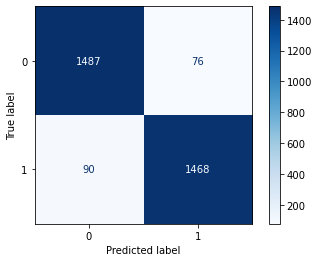

In [25]:

optimized_pred_Y = grid.best_estimator_.predict(test_X)

disp = plot_confusion_matrix(grid.best_estimator_, test_X, test_Y,cmap=plt.cm.Blues)
plt.savefig("log_reg_optimized_confusion.png")


In [29]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, optimized_pred_Y) * 100, 2)) + "%")

Model Accuracy: 94.68%


In [30]:
print(classification_report(test_Y,optimized_pred_Y))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1563
           1       0.95      0.94      0.95      1558

    accuracy                           0.95      3121
   macro avg       0.95      0.95      0.95      3121
weighted avg       0.95      0.95      0.95      3121



# N Gram

In [31]:
ngram = (1, 2)

In [32]:
model = Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, ngram_range=ngram)),('log', LogisticRegression())])
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

In [24]:
grid=RandomizedSearchCV(model,param_grid, n_jobs=3, n_iter=10)
start_time = time.time()
grid_result = grid.fit(train_X, train_Y)
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Execution time: 3502.3301813602448 ms
Best parameter (CV score=0.946):
{'log__tol': 0.001, 'log__penalty': 'l2', 'log__max_iter': 80, 'log__dual': False}


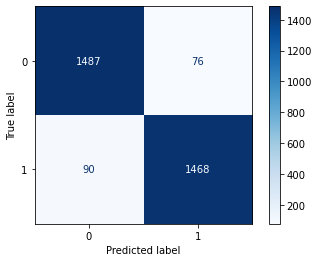

In [26]:
optimized_pred_Y = grid.best_estimator_.predict(test_X)

disp = plot_confusion_matrix(grid.best_estimator_, test_X, test_Y,cmap=plt.cm.Blues)
plt.savefig("log_reg_optimized_confusion.png")

In [27]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, optimized_pred_Y) * 100, 2)) + "%")

Model Accuracy: 94.68%


In [28]:
print(classification_report(test_Y,optimized_pred_Y))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1563
           1       0.95      0.94      0.95      1558

    accuracy                           0.95      3121
   macro avg       0.95      0.95      0.95      3121
weighted avg       0.95      0.95      0.95      3121

